<a href="https://colab.research.google.com/github/mostaphafakihi/mostaphafakihi-Scraping-et-analyse-des-donn-es-Site-e-commerce-/blob/main/Scraping%20et%20analyse%20des%20donn%C3%A9es%20Site-E-commerce(avito).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
data = pd.read_csv('/content/drive/MyDrive/data/data.csv')


In [52]:
data.sample(5)

,nom,date,lieu,titre,annonce,prix,type,autres.info,telephone,vues
57324,Ayoub selami,17 Mar 16:30,Kénitra,Renault Scenic -2006,Je met ma voiture à vendre pour les personnes ...,52 000,"Voitures, Offre",Année-Modèle 2006 Kilométrage 200 000 - ...,0680800759,1817.0
2856,Abdelhadi,Hier 14:28,El Jadida,canari,Canari récessif blanc et jaune + canari intensif,250,"Animaux, Offre",Secteur Hay Essalam Type,0669733131,82.0
27272,ORIVORA,28 Mar 09:06,Casablanca,Appareil de filtration d'eau 5 etap Réf qGTWm,Salut à tous et bienvenue chez notre boutiqueE...,test,"Electroménager et Vaisselles, Offre",Secteur Hay Hassani Type,0660147771,39.0
73740,mohamed,14 Mar 17:17,Ouarzazate,Volkswagen Touran -2005,touran 2005 diwana 2016,94 000,"Voitures, Offre",Année-Modèle 2005 Kilométrage 10 000 - 1...,0658911941,956.0
19315,HOME OF WORKSTATION,31 Mar 11:34,Rabat,HP Z230 DESKTOP i5-4570,** la promotion débutera du 10/02/2020 au 30/0...,2 950,"Ordinateurs de bureau, Offre",Secteur Abi Ragrag Type,0661537355,19.0


In [53]:
data.shape

(88554, 10)

In [6]:
## Nombre total des annonces
data['nom'].count()

88532

In [56]:
# eliminer les annonces repetées
du=data.drop_duplicates()

In [57]:
#elimination des annonces dont le type est inconnue
df=du[du['type'].notnull()]

In [58]:
df['type']=df['type'].apply(lambda var:var.split(',')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Analyse

In [7]:
## Nombre d'annonces par ville
ville=data.groupby('lieu')
v=ville['nom'].count().sort_values(ascending=False)
v

lieu
 Casablanca            26893
 Rabat                 10145
 Marrakech              8177
 Tanger                 5854
 Agadir                 5642
                       ...  
 Souk Tlet El Gharb        1
 Bni Chiker                1
 Oulad Al Toualaa          1
 Figuig                    1
 Lkhaloua                  1
Name: nom, Length: 392, dtype: int64

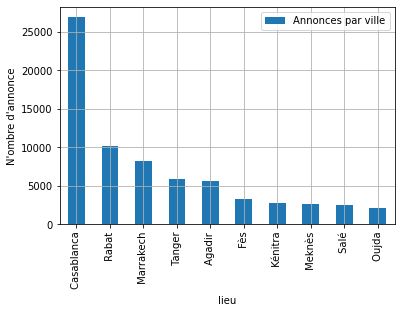

In [8]:
## Les 10 villes avec le plus d'annonces
v.sort_values(ascending=False).head(10).plot(kind='bar',label='Annonces par ville')
plt.ylabel("N'ombre d'annonce")
plt.grid()
plt.legend()
plt.show()

In [9]:
## Nombre d'annonces par type
group=data.groupby('type')
typ=group['nom'].count()
typ.sort_values(ascending=False)

type
 Matériels Professionnels, Offre                                     9483
 Voitures, Offre                                                     9308
 Ordinateurs de bureau, Offre                                        8926
 Téléphones, Offre                                                   6836
 Accessoires informatique et Gadgets, Offre                          5099
 Pièces et Accessoires pour véhicules, Offre                         4612
 Ordinateurs portables, Offre                                        4423
 Meubles et Décoration, Offre                                        4097
 Electroménager et Vaisselles, Offre                                 3057
 Appartements, Offre de location                                     2858
 Appartements, Offre                                                 2599
 Animaux, Offre                                                      2597
 Motos, Offre                                                        2470
 Jeux vidéo et Consoles, Offre   

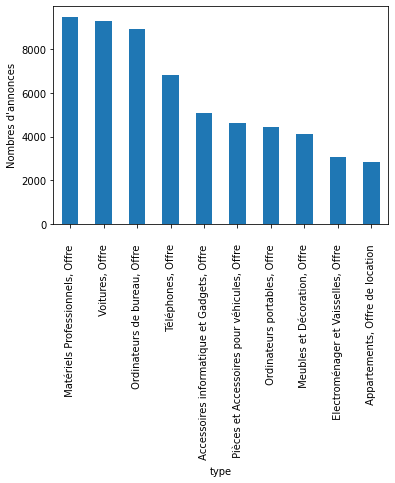

In [17]:
## Les 10 catégories avec le plus d'annonces
typ.sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Nombres d'annonces")
plt.xlabel("type")
plt.show()

In [65]:
## les categories les plus vues
cat=data.groupby('type')
cat['vues'].sum().sort_values(ascending=False)

type
 Voitures, Offre                                                     9555414.0
 Appartements, Offre de location                                     2600266.0
 Téléphones, Offre                                                   1306301.0
 Motos, Offre                                                        1179777.0
 Appartements, Offre                                                  921112.0
 Animaux, Offre                                                       648696.0
 Maisons et Villas, Offre                                             531044.0
 Terrains et Fermes, Offre                                            525041.0
 Camions, Offre                                                       508978.0
 Jeux vidéo et Consoles, Offre                                        503385.0
 Ordinateurs portables, Offre                                         494069.0
 Ordinateurs de bureau, Offre                                         454184.0
 Meubles et Décoration, Offre                  

In [66]:
a=((df.groupby('type')['vues'].sum().sort_values(ascending=False).head(19))/(df['type'].value_counts())).sort_values(ascending=False).head(10)


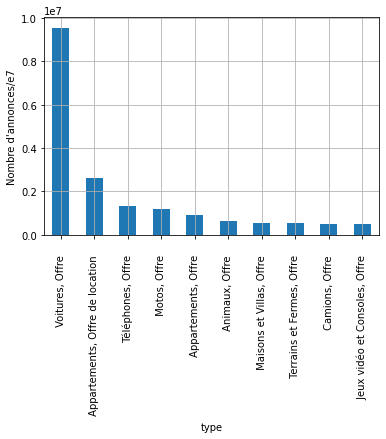

In [67]:
## les 10 categories les plus vues
cat['vues'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("type")
plt.ylabel("Nombre d'annonces/e7")
plt.grid()
plt.show()

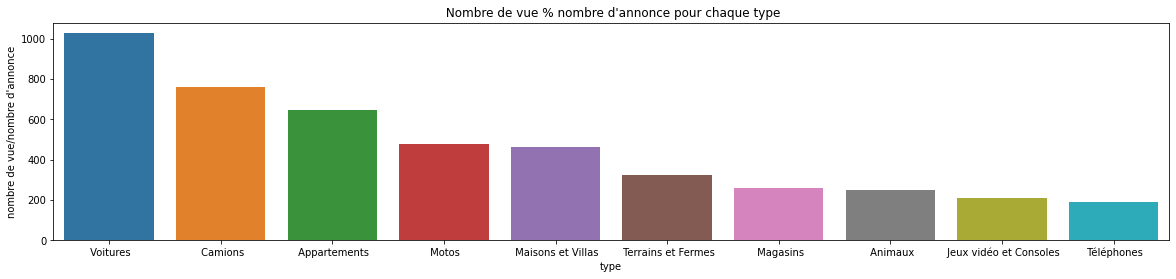

In [68]:
plt.figure(figsize=(20,4))
plt.xlabel("type")
plt.ylabel("nombre de vue/nombre d'annonce")
plt.title(" Nombre de vue % nombre d'annonce pour chaque type")
sns.barplot(x=a.index,y=a)

In [69]:
## les villes des annonces les plus consultés
data.groupby('lieu').sum()['vues'].sort_values(ascending=False)

lieu
 Casablanca    7117430.0
 Marrakech     2093324.0
 Rabat         1768845.0
 Tanger        1311377.0
 Agadir        1297013.0
                 ...    
 Itzer              27.0
 Ait Ichou          26.0
 Jorf               23.0
 Ain Leuh           20.0
 Ben Smim           14.0
Name: vues, Length: 392, dtype: float64

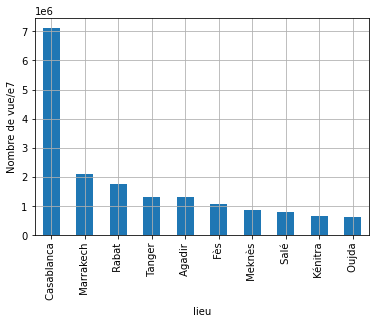

In [70]:
data.groupby('lieu').sum()['vues'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Nombre de vue/e7")
plt.grid()
plt.show()

# Trouver un facteur qui determine les prix de maison

**preparation des donnees**

In [86]:
stat=data[data['type']==' Maisons et Villas, Offre    ']

In [87]:
stat=stat[stat['prix']!='test']


In [88]:
stat['prix']=stat['prix'].apply(lambda var:int(var.replace(' ','')))#convertir le type de la colonne en int


In [89]:
stat=stat[stat['prix']>=200000]


In [90]:
stat=stat[stat['autres.info'].apply(lambda var:len(var.split('   Nombre de pièces   '))==2)]


In [91]:
stat['nombre de piece']=stat['autres.info'].apply(lambda var:var.split('   Nombre de pièces   ')[1][0:2])
#creation d' une nouvelle colonne nombre de piece

In [92]:
stat['surface']=stat['autres.info'].apply(lambda var:var.split('Surface totale ')[1].split('m²')[0])
#creation d'une nouvelle colonne surface


In [93]:
stat=stat[stat['surface'].apply(lambda var:len(var)<=4)]# eliminer les maisons dont la surface est inconnue
stat['surface']=stat['surface'].apply(lambda var:int(var))#changer le type de la collone surface
stat=stat[stat['nombre de piece'].apply(lambda var:var!='- ')]#eliminer les maisons dont le nombre de piece  est inconnu
stat['nombre de piece']=stat['nombre de piece'].apply(lambda var:int(var))#changer le type de la collone nombre de piece


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


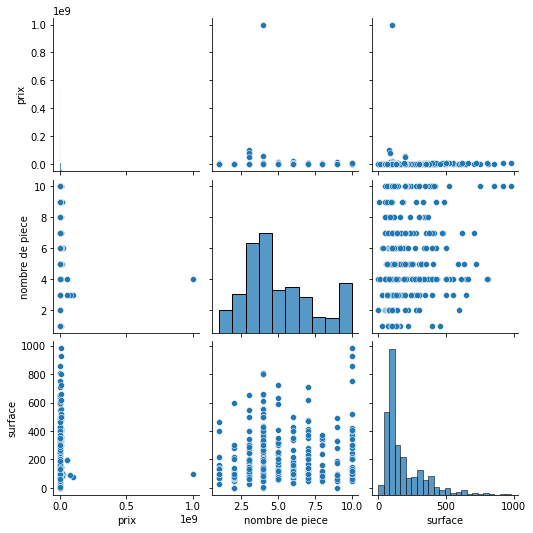

In [94]:
# presentation des donnees 
sns.pairplot(stat.drop('vues',axis=1))
#on remarque qu'il y une incoherence dans les donnees il y a des points isolés 
#on elimine ces points

In [95]:
stat['prix'].sort_values(ascending=False)# on prend que les donnees dont le prix est inferieur a  14 000 000


68349    1000000000
42092      98000000
81427      78000000
43042      55000000
88360      52000000
            ...    
77114        220000
14371        220000
51582        210000
66118        200000
76473        200000
Name: prix, Length: 420, dtype: int64

In [96]:
stat=stat[stat['prix']<=14000000]

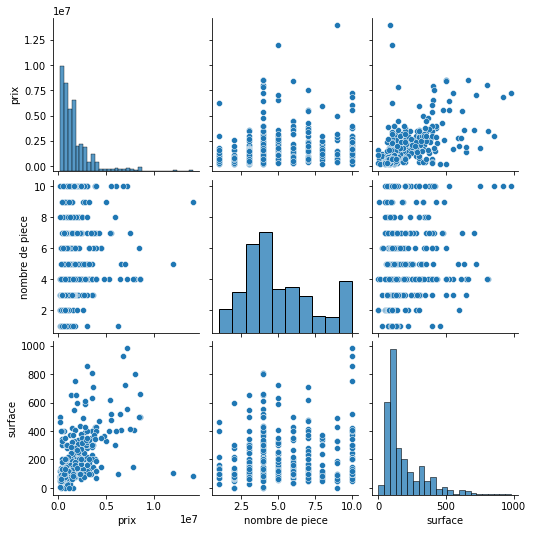

In [97]:
#verifcation
sns.pairplot(stat.drop('vues',axis=1))
#mieux qu'avant

In [98]:
#amelioration
stat=stat[stat['prix']<=max(stat[stat['nombre de piece']==10]['prix'])]


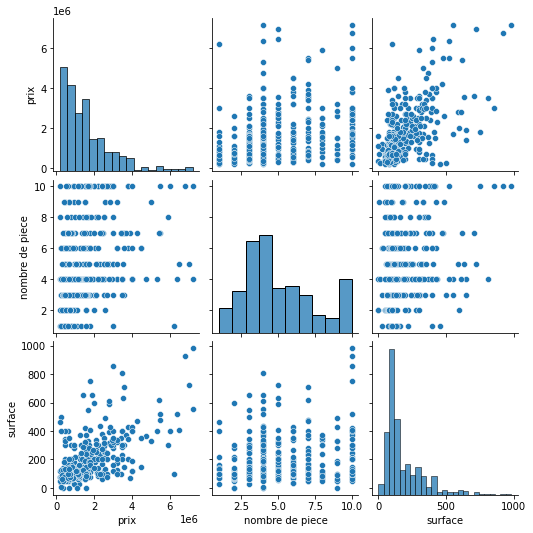

In [99]:
#verification 2
sns.pairplot(stat.drop('vues',axis=1))
#remarque plus de point isolé

In [100]:
X=stat[['surface','nombre de piece']]
y=stat['prix']


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#on divise data en deux parties
#une pour trainer le model et l'autre pour le tester

In [102]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)#trainer le model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(normalize=False)

In [103]:
predict=lm.predict(X_test)

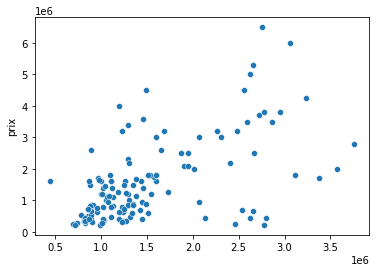

In [104]:
sns.scatterplot(x=predict,y=y_test)